In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests

In [4]:
import numexpr as ne

In [6]:
import flask

In [7]:
import pystan

In [13]:
data = pd.read_csv("AirPassengers.csv")

In [14]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [30]:
data

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [17]:
pip install fbprophet

In [19]:
from fbprophet import Prophet

In [24]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [22]:
data.columns=['ds','y']

In [25]:
model.fit(data)

In [26]:
future_prediction=model.make_future_dataframe(periods=365,freq="D")

In [33]:
future_prediction.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [27]:
future_prediction.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [28]:
forecast=model.predict(future_prediction)

In [29]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,110.866230,60.514748,114.741172,110.866230,110.866230,-24.207455,-24.207455,-24.207455,-3.983962,...,1.141335,1.141335,1.141335,-21.364828,-21.364828,-21.364828,0.0,0.0,0.0,86.658775
1,1949-02-01,113.023136,47.654944,103.978787,113.023136,113.023136,-37.385781,-37.385781,-37.385781,-3.983962,...,-3.829411,-3.829411,-3.829411,-29.572408,-29.572408,-29.572408,0.0,0.0,0.0,75.637355
2,1949-03-01,114.971309,77.165581,136.353531,114.971309,114.971309,-7.739733,-7.739733,-7.739733,-3.983962,...,-3.829411,-3.829411,-3.829411,0.073641,0.073641,0.073641,0.0,0.0,0.0,107.231577
3,1949-04-01,117.128216,83.704143,139.272821,117.128216,117.128216,-4.457539,-4.457539,-4.457539,-3.983962,...,4.766333,4.766333,4.766333,-5.239910,-5.239910,-5.239910,0.0,0.0,0.0,112.670677
4,1949-05-01,119.215544,82.466079,139.186431,119.215544,119.215544,-8.985005,-8.985005,-8.985005,-3.983962,...,-1.589642,-1.589642,-1.589642,-3.411402,-3.411402,-3.411402,0.0,0.0,0.0,110.230539


In [32]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   86.658775   60.514748  114.741172
1 1949-02-01   75.637355   47.654944  103.978787
2 1949-03-01  107.231577   77.165581  136.353531
3 1949-04-01  112.670677   83.704143  139.272821
4 1949-05-01  110.230539   82.466079  139.186431


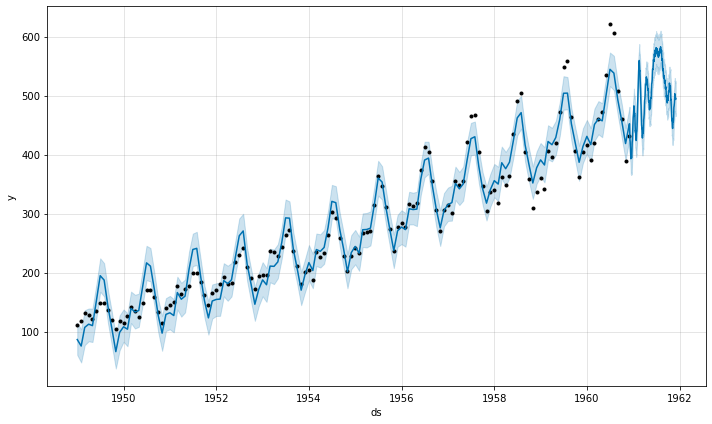

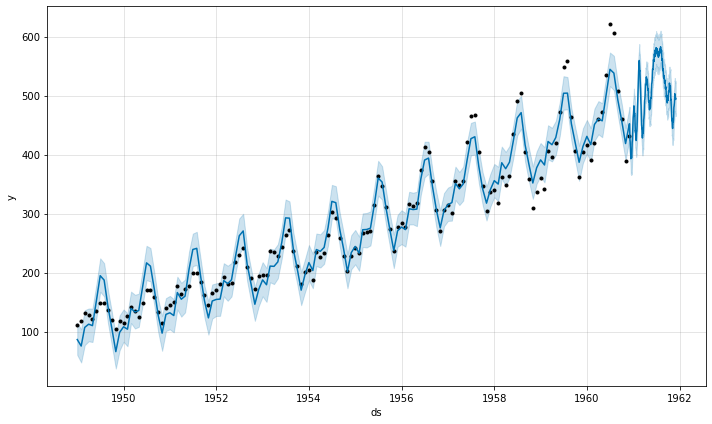

In [34]:
model.plot(forecast)

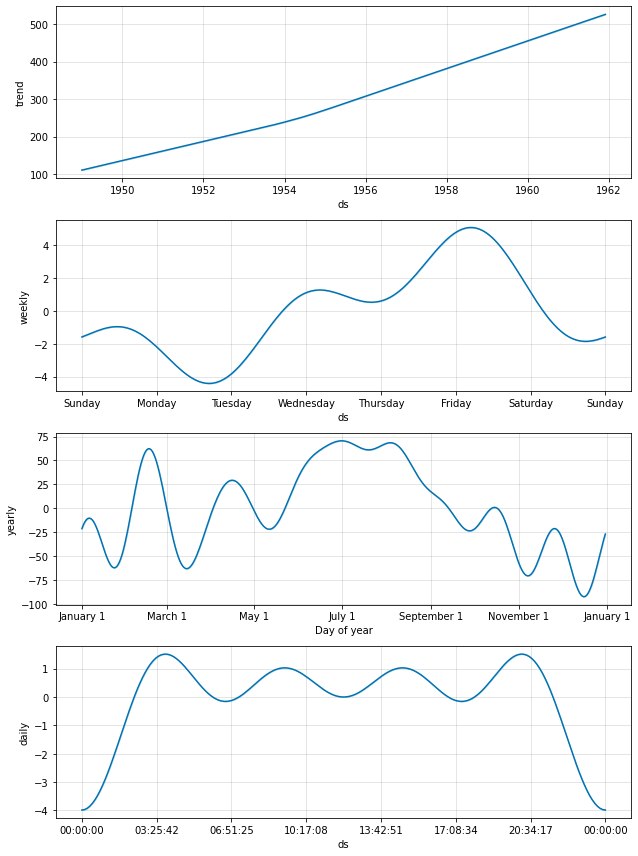

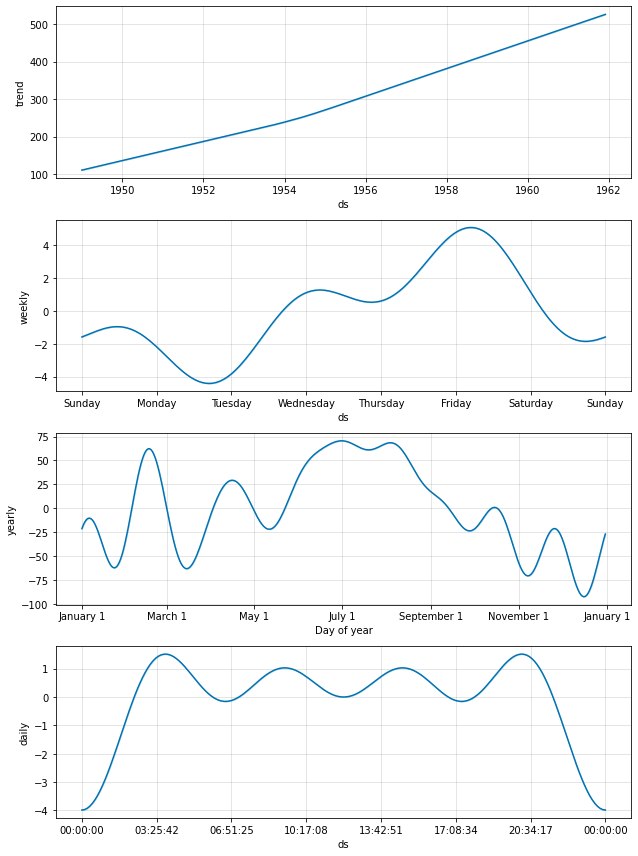

In [35]:
model.plot_components(forecast)

In [36]:
from fbprophet.diagnostics import cross_validation

In [37]:
cv=cross_validation(model,initial='530 days',period='180 days',horizon='365 days')
cv

INFO:fbprophet:Making 20 forecasts with cutoffs between 1950-07-22 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,-1070.310502,-1070.536897,-1070.037012,170,1950-07-22
1,1950-09-01,-858.246677,-859.318694,-857.326244,158,1950-07-22
2,1950-10-01,-131.904148,-133.822278,-130.000377,133,1950-07-22
3,1950-11-01,128.838672,125.818553,131.958456,114,1950-07-22
4,1950-12-01,-677.405442,-681.683067,-673.023282,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,522.195683,494.977874,544.966288,606,1959-12-02
236,1960-09-01,488.068239,464.645906,512.097407,508,1959-12-02
237,1960-10-01,454.733722,428.715261,480.310795,461,1959-12-02
238,1960-11-01,423.456798,396.662535,449.500302,390,1959-12-02


In [38]:
from fbprophet.diagnostics import performance_metrics

In [39]:
pm=performance_metrics(cv)

In [40]:
pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,108334.585488,329.142196,120.646178,0.657021,0.093201,0.208333
1,42 days,108319.002793,329.118524,121.372438,0.662240,0.094463,0.166667
2,46 days,44473.292106,210.886918,74.101295,0.378693,0.095396,0.125000
3,47 days,44416.913093,210.753204,73.639629,0.376928,0.095396,0.125000
4,48 days,44344.735887,210.581898,72.135275,0.366531,0.094463,0.125000


In [41]:
import pickle

In [42]:
pickle.dump(model,open('airpassengers.pkl','wb'))